In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [481]:
df_real = pd.read_csv("winequality-white.csv")
df = df_real

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


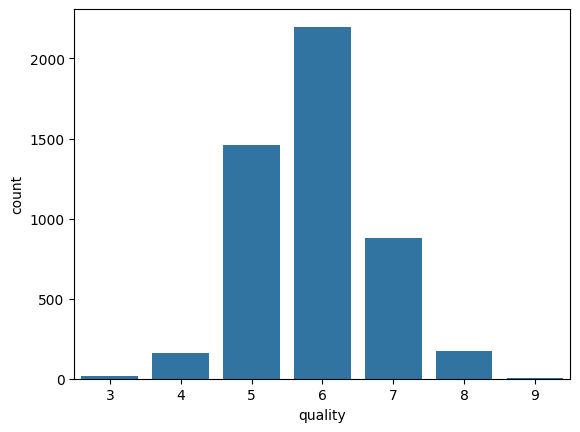

In [482]:
print(df["quality"].value_counts())
sns.countplot(data = df, x = 'quality');

In [483]:
df.dtypes;
df.isnull().sum();
df = df.drop_duplicates();
df.describe();
df.var();

<Axes: >

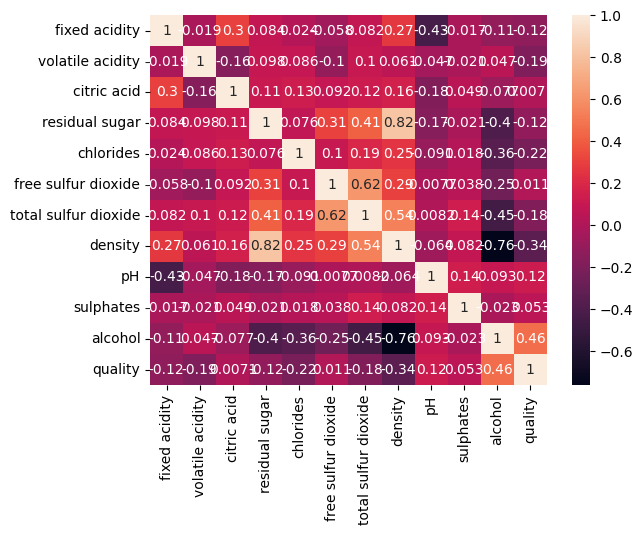

In [484]:
sns.heatmap(df.corr(), annot = True)

In [485]:
df.drop(columns = ['density'], inplace = True)

C:\Users\mdamb\AppData\Local\Temp\ipykernel_9396\3946042721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['density'], inplace = True)


In [486]:
dataloss = ((df.shape[0] - df_real.shape[0])/(df_real.shape[0])) * 100
print(f"Data loss after cleaning: {dataloss:.2f}%")
df.shape[0]

Data loss after cleaning: -19.13%


3961

In [487]:
df.describe().T;
df = df.reset_index(drop = True)

<Axes: >

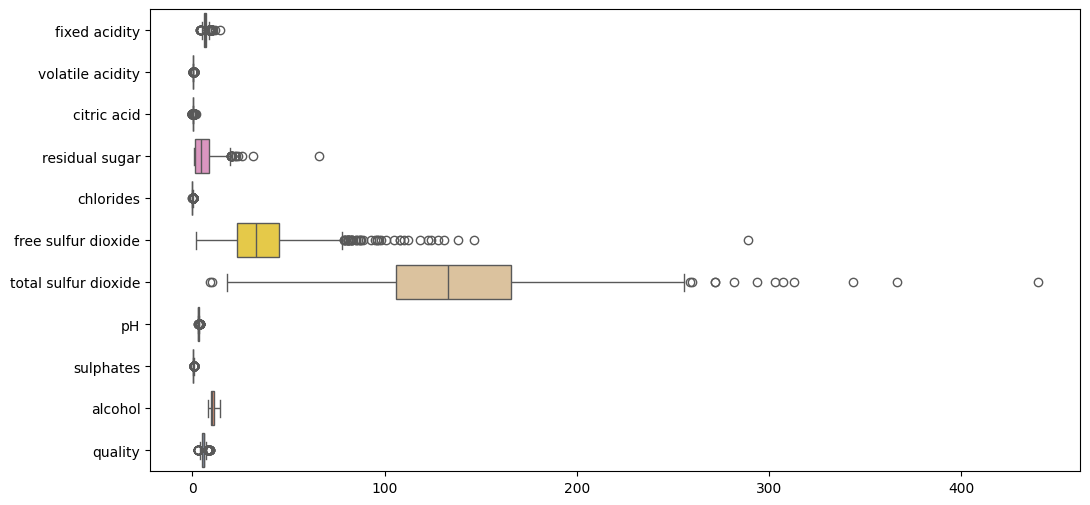

In [488]:
#sns.pairplot(df, hue = 'quality');
plt.figure(figsize=(12,6))
sns.boxplot(data = df, orient="h", palette="Set2")


<Axes: ylabel='residual sugar'>

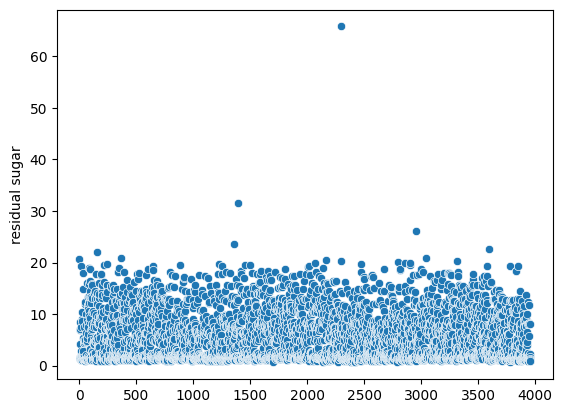

In [489]:
sns.scatterplot(data = df['residual sugar'])

In [490]:
df = df[(df['fixed acidity'] >=4) & (df['fixed acidity'] <= 10)]
df.shape[0]

3953

In [491]:
df = df[df['residual sugar'] <= 21]
df.shape[0]

3947

In [492]:
df = df[df['free sulfur dioxide'] <= 75]
df.shape[0]

3891

In [493]:
df = df[(df['total sulfur dioxide'] <= 250) & (df['total sulfur dioxide'] >= 50)]
df.shape[0]

3840

<Axes: >

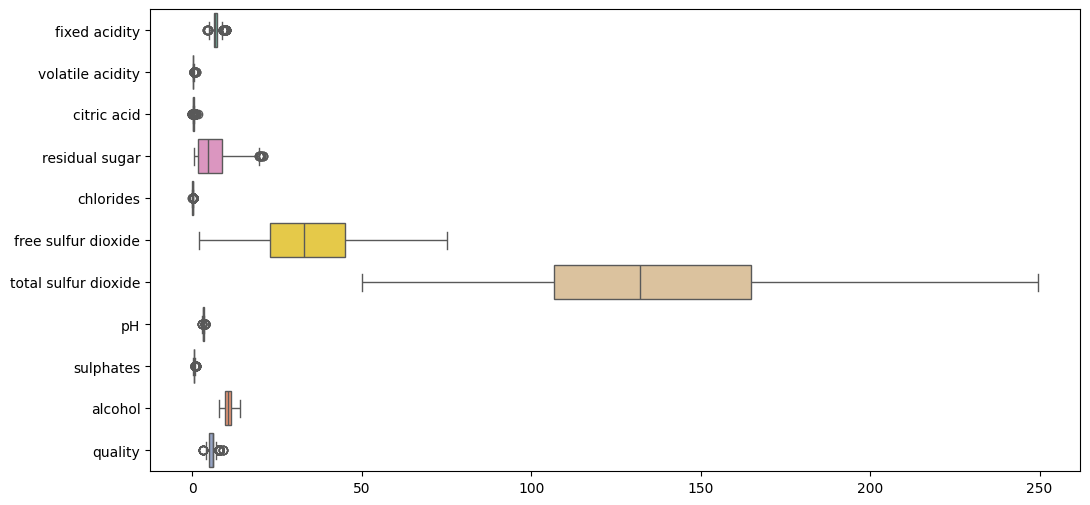

In [494]:
#sns.pairplot(df, hue = 'quality');
plt.figure(figsize=(12,6))
sns.boxplot(data = df, orient="h", palette="Set2")


In [495]:
dataloss = ((df.shape[0] - df_real.shape[0])/(df_real.shape[0])) * 100
print(f"Data loss after cleaning: {dataloss:.2f}%")
df.shape[0]

Data loss after cleaning: -21.60%


3840

In [496]:
y = df['quality']
X = df.drop(columns = "quality",axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

In [497]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [498]:
def prediction(X, w, b):
    return (np.dot(X, w) + b)

In [499]:
def cost_func(y_pre,y_train, m ):
    return ((1/(2*m)) * np.sum((y_pre - y_train)**2))

In [500]:
def gradient_descent(y_pre, w, b, X_train, y_train, lr, m):
    error = y_pre - y_train
    w = w - lr * ((1/m) * np.dot(X_train.T, error))
    b = b - lr * ((1/m) * np.sum(error))
    return w, b

In [506]:
w = np.zeros(10)
b=0
lr = 0.0005
m = X_train.shape[0]
epochs = 20000
cost_list = []
for i in range(epochs):
    y_pre = prediction(X_train, w, b)
    cost = cost_func(y_pre,y_train, m)
    cost_list.append(cost)
    w, b = gradient_descent(y_pre, w, b, X_train, y_train, lr, m)

r2_train = r2_score(y_train, y_pre)
r2_train

0.29509672391373076

In [502]:
print(f"Trained weight: {w}")
print(f"Trained bias: {b}")

Trained weight: [-0.01731697 -0.16134445  0.00722524  0.09797879 -0.02759146  0.14166787
 -0.07448865  0.05168206  0.03692256  0.44888813]
Trained bias: 5.867898313689011


In [ ]:
y_pred = prediction(X_test, w, b)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 0.48
RMSE: 0.69
R2 Score: 0.34
